In [144]:
import pandas as pd
import re


data = {'Name':['RdbmsClipboardloader','RdbmsClipboardloader','RdbmsClipboardloader'],
'StartTime':['Sat Oct 11 20:21:15 EDT 2020','Sat Oct 10 20:21:15 EDT 2020','Sat Oct 12 20:21:15 EDT 2020'],
'Additional info': ['total: [476200]ms; resolve ref in :[2998001]ms; build objects in: [1000]ms; Loaded Item count : 23758;','total: [476200]ms; resolve ref in :[2998001]ms; build objects in: [500]ms; Loaded Item count : 23758;','total: [476200]ms; resolve ref in :[2998001]ms; build objects in: [3000]ms; Loaded Item count : 4500;']}

df = pd.DataFrame(data)
df

,Name,StartTime,Additional info
0,RdbmsClipboardloader,Sat Oct 11 20:21:15 EDT 2020,total: [476200]ms; resolve ref in :[2998001]ms...
1,RdbmsClipboardloader,Sat Oct 10 20:21:15 EDT 2020,total: [476200]ms; resolve ref in :[2998001]ms...
2,RdbmsClipboardloader,Sat Oct 12 20:21:15 EDT 2020,total: [476200]ms; resolve ref in :[2998001]ms...


In [145]:
def extract_time(df, index):
    values =[]

    for x in df['Additional info']:
        #print(x)
        tokens = x.split(';')
        #print(tokens)
        #print(tokens[index])
        ms = tokens[index].split(':')[1]
        #print(int(re.findall(r'\d+', ms) [0]))
        time_in_ms = int(re.findall(r'\d+', ms) [0])
        #print(time_in_ms)
        values.append(time_in_ms)
    return values

In [146]:
resolveref = extract_time(df,1)
print(resolveref)


[2998001, 2998001, 2998001]


In [147]:
itemcount = extract_time(df,3)
print(itemcount)

[23758, 23758, 4500]


In [148]:
builditemstime = extract_time(df,2)
print(builditemstime)

[1000, 500, 3000]


In [149]:
totaltime = extract_time(df,0)
print(totaltime)

[476200, 476200, 476200]


In [150]:
df['ResolveRef'] = resolveref
df['BuildItem'] = builditemstime
df['ItemCount'] = itemcount
df['TotalTime'] = totaltime


In [151]:
df

,Name,StartTime,Additional info,ResolveRef,BuildItem,ItemCount,TotalTime
0,RdbmsClipboardloader,Sat Oct 11 20:21:15 EDT 2020,total: [476200]ms; resolve ref in :[2998001]ms...,2998001,1000,23758,476200
1,RdbmsClipboardloader,Sat Oct 10 20:21:15 EDT 2020,total: [476200]ms; resolve ref in :[2998001]ms...,2998001,500,23758,476200
2,RdbmsClipboardloader,Sat Oct 12 20:21:15 EDT 2020,total: [476200]ms; resolve ref in :[2998001]ms...,2998001,3000,4500,476200


In [152]:
pd.to_datetime(df['StartTime'], format='%a %b %d %H:%M:%S EDT %Y')
#Sat Oct 10 20:21:15 EDT 2020
#%a Oct 10 20:21:15 EDT 2020

0   2020-10-11 20:21:15
1   2020-10-10 20:21:15
2   2020-10-12 20:21:15
Name: StartTime, dtype: datetime64[ns]

In [153]:
df['CacheLoadDate'] = pd.to_datetime(df['StartTime'], format='%a %b %d %H:%M:%S EDT %Y').dt.strftime('%d-%b-%Y')

In [154]:
df

,Name,StartTime,Additional info,ResolveRef,BuildItem,ItemCount,TotalTime,CacheLoadDate
0,RdbmsClipboardloader,Sat Oct 11 20:21:15 EDT 2020,total: [476200]ms; resolve ref in :[2998001]ms...,2998001,1000,23758,476200,11-Oct-2020
1,RdbmsClipboardloader,Sat Oct 10 20:21:15 EDT 2020,total: [476200]ms; resolve ref in :[2998001]ms...,2998001,500,23758,476200,10-Oct-2020
2,RdbmsClipboardloader,Sat Oct 12 20:21:15 EDT 2020,total: [476200]ms; resolve ref in :[2998001]ms...,2998001,3000,4500,476200,12-Oct-2020


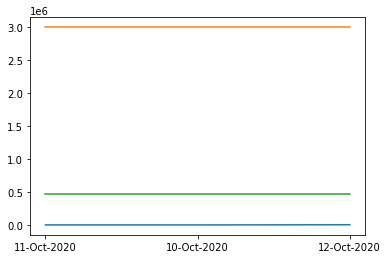

In [155]:
from matplotlib  import pyplot as plt

#plt.plot(df.CacheLoadDate,df.ItemCount)
plt.plot(df.CacheLoadDate,df.BuildItem)
plt.plot(df.CacheLoadDate,df.ResolveRef)
plt.plot(df.CacheLoadDate,df.TotalTime)
plt.show()


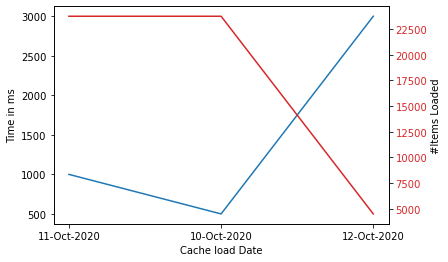

In [156]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Cache load Date')
ax1.set_ylabel('Time in ms')
ax1.plot(df.CacheLoadDate,df.BuildItem)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.set_ylabel('#Items Loaded')
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(df.CacheLoadDate,df.ItemCount, color=color)

plt.show()